In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.compose import ColumnTransformer
%matplotlib inline
mpl.style.use('ggplot')

In [2]:
car=pd.read_csv('quikr_car.csv')

In [3]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
car.shape

(892, 6)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
backup=car.copy()

# DATA CLEANING

# for YEAR

In [7]:
car['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

#### for YEAR change Dtaype object int & remove non year values

In [8]:
car=car[car['year'].str.isnumeric()]

In [7]:
car['year']=car['year'].astype(int)

ValueError: invalid literal for int() with base 10: '...'

In [10]:
car['year'].unique()

array([2007, 2006, 2018, 2014, 2015, 2012, 2013, 2016, 2010, 2017, 2008,
       2011, 2019, 2009, 2005, 2000, 2003, 2004, 1995, 2002, 2001])

# for price

In [11]:
car['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

#### change data type And remove row where price is 'Ask For Price'

In [12]:
car=car[car['Price']!='Ask For Price']

In [13]:
car['Price']=car['Price'].str.replace(',','').astype(int)

In [14]:
car['Price'].unique()

array([  80000,  425000,  325000,  575000,  175000,  190000,  830000,
        250000,  182000,  315000,  415000,  320000, 1000000,  500000,
        350000,  160000,  310000,   75000,  100000,  290000,   95000,
        180000,  385000,  105000,  650000,  689999,  448000,  549000,
        501000,  489999,  280000,  349999,  284999,  345000,  499999,
        235000,  249999, 1475000,  395000,  220000,  170000,   85000,
        200000,  570000,  110000,  448999, 1891111,  159500,  344999,
        449999,  865000,  699000,  375000,  224999, 1200000,  195000,
        351000,  240000,   90000,  155000,  600000,  189500,  210000,
        390000,  135000, 1600000,  701000,  265000,  525000,  372000,
        635000,  550000,  485000,  329500,  251111,  569999,   69999,
        299999,  399999,  450000,  270000,  158400,  179000,  125000,
        299000,  150000,  275000,  285000,  340000,   70000,  289999,
        849999,  749999,  274999,  984999,  599999,  244999,  474999,
        245000,  169

# for KMs_Driven 

In [15]:
car['kms_driven'].unique()

array(['45,000 kms', '40 kms', '28,000 kms', '36,000 kms', '41,000 kms',
       '25,000 kms', '24,530 kms', '60,000 kms', '30,000 kms',
       '32,000 kms', '48,660 kms', '4,000 kms', '16,934 kms',
       '43,000 kms', '35,550 kms', '39,522 kms', '39,000 kms',
       '55,000 kms', '72,000 kms', '15,975 kms', '70,000 kms',
       '23,452 kms', '35,522 kms', '48,508 kms', '15,487 kms',
       '82,000 kms', '20,000 kms', '68,000 kms', '38,000 kms',
       '27,000 kms', '33,000 kms', '46,000 kms', '16,000 kms',
       '47,000 kms', '35,000 kms', '30,874 kms', '15,000 kms',
       '29,685 kms', '1,30,000 kms', '19,000 kms', '54,000 kms',
       '13,000 kms', '38,200 kms', '22,000 kms', '50,000 kms',
       '13,500 kms', '3,600 kms', '45,863 kms', '60,500 kms',
       '12,500 kms', '18,000 kms', '13,349 kms', '29,000 kms',
       '44,000 kms', '42,000 kms', '14,000 kms', '49,000 kms',
       '36,200 kms', '51,000 kms', '1,04,000 kms', '33,333 kms',
       '33,600 kms', '5,600 kms', '7,500 km

#### remove "kms" from last AND change Dtype AND Remove row with value 'Petrol'

In [16]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

In [17]:
car=car[car['kms_driven'].str.isnumeric()]

In [18]:
car['kms_driven']=car['kms_driven'].astype(int)

In [19]:
car['kms_driven'].unique()

array([ 45000,     40,  28000,  36000,  41000,  25000,  24530,  60000,
        30000,  32000,  48660,   4000,  16934,  43000,  35550,  39522,
        39000,  55000,  72000,  15975,  70000,  23452,  35522,  48508,
        15487,  82000,  20000,  68000,  38000,  27000,  33000,  46000,
        16000,  47000,  35000,  30874,  15000,  29685, 130000,  19000,
        54000,  13000,  38200,  22000,  50000,  13500,   3600,  45863,
        60500,  12500,  18000,  13349,  29000,  44000,  42000,  14000,
        49000,  36200,  51000, 104000,  33333,  33600,   5600,   7500,
        26000,  24330,  65480, 200000,  59000,  99000,   2800,  21000,
        11000,  66000,   3000,   7000,  38500,  37200,  43200,  24800,
        45872,  40000,  11400,  97200,  52000,  31000, 175430,  37000,
        65000,   3350,  75000,  62000,  73000,   2200,  54870,  34580,
        97000,     60,  80200,   3200,      0,   5000,    588,  71200,
       175400,   9300,  56758,  10000,  56450,  56000,  32700,   9000,
      

# for fuel_type

In [20]:
car['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

##Remove nan value's

In [21]:
car=car[~car['fuel_type'].isna()]

In [22]:
car['fuel_type'].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

#### NOW DATA IS FULLY CLEANED see the difference.

In [23]:
backup.shape

(892, 6)

In [24]:
car.shape

(816, 6)

#### Company does not need any cleaning now. Changing car names. Keeping only the first three words

In [25]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [26]:
car['name']

0         Hyundai Santro Xing
1         Mahindra Jeep CL550
3           Hyundai Grand i10
4      Ford EcoSport Titanium
6                   Ford Figo
                ...          
883        Maruti Suzuki Ritz
885            Tata Indica V2
886      Toyota Corolla Altis
888              Tata Zest XM
889        Mahindra Quanto C8
Name: name, Length: 816, dtype: object

#### Resetting the index of the final cleaned data

In [27]:
car=car.reset_index(drop=True)

# Cleaned Data

In [28]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [29]:
car.to_csv('Cleaned_Car_data.csv')

In [30]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [31]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


#### there are some ouliers when you check max price and other price of car

##check for car that price is greater than 60,00,000

In [32]:
car[car['Price']>6e6]

,name,company,year,Price,kms_driven,fuel_type
534,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [33]:
car=car[car['Price']<6e6]

In [34]:
car[car['Price']>6e6]

,name,company,year,Price,kms_driven,fuel_type


In [35]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [36]:
car.to_csv('cleaned car.csv')

#                          MODEL

In [37]:
x=car.drop(columns='Price')
## x has every thing except price 
y=car['Price']

In [38]:
x

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [39]:
y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
811    270000
812    110000
813    300000
814    260000
815    390000
Name: Price, Length: 815, dtype: int32

In [40]:
import seaborn as sns

# Checking relationship of Company with Price

In [41]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

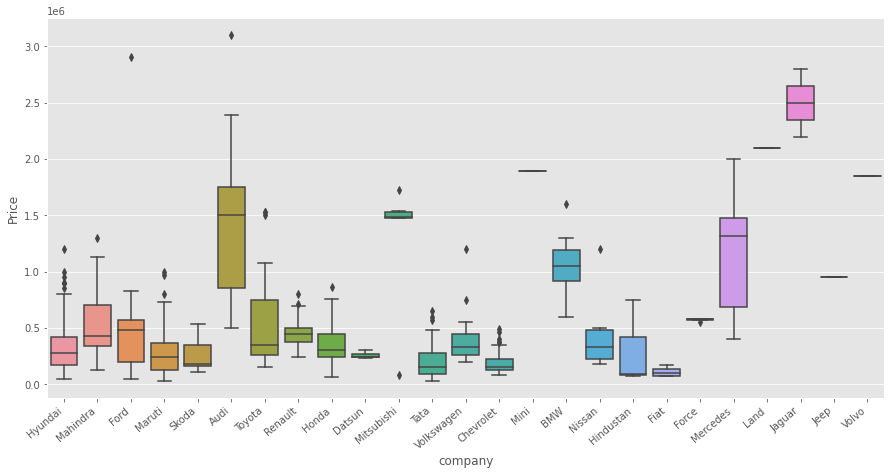

In [42]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

# Checking relationship of kms_driven with Price

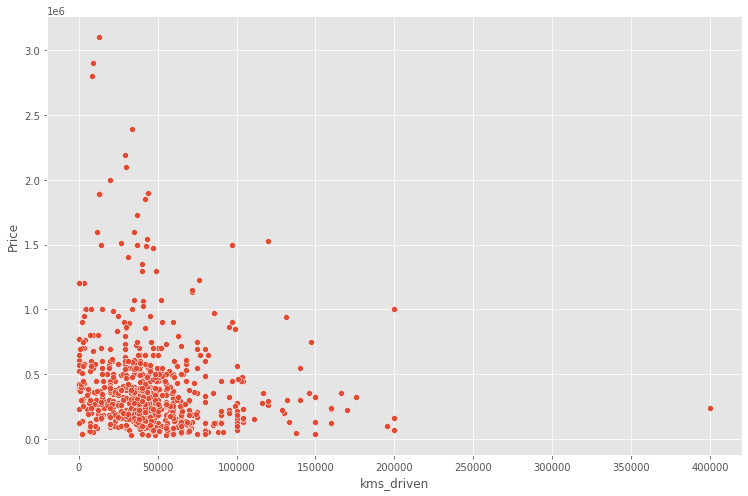

In [43]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

# Checking relationship of Fuel Type with Price

<AxesSubplot:xlabel='fuel_type', ylabel='Price'>

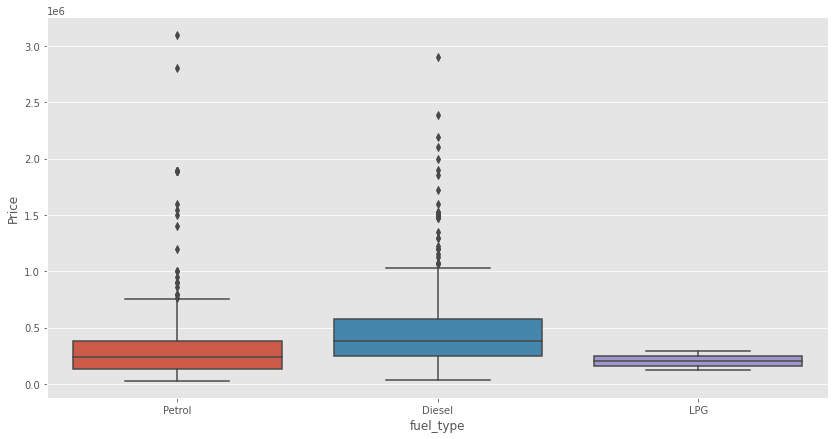

In [44]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

# Relationship of Price with FuelType, Year and Company mixed

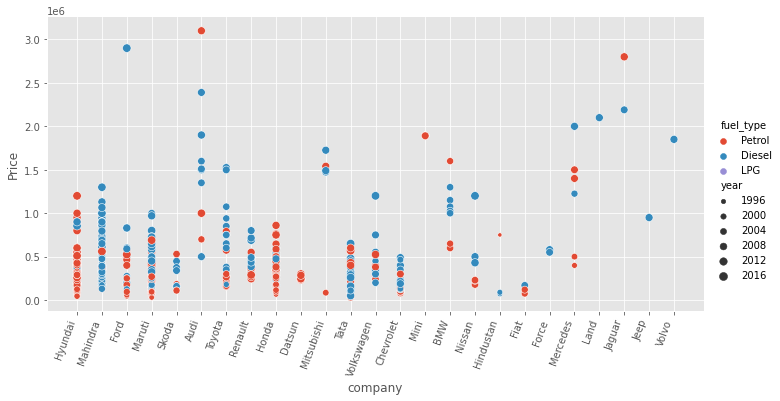

In [45]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=5,aspect=2)
ax.set_xticklabels(rotation=70,ha='right')

# Extracting Training Data

In [46]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [47]:
x

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [48]:
y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
811    270000
812    110000
813    300000
814    260000
815    390000
Name: Price, Length: 815, dtype: int32

In [49]:
x.shape

(815, 5)

In [50]:
y.shape

(815,)

# Applying Train Test Split

In [51]:
x

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [52]:
y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
811    270000
812    110000
813    300000
814    260000
815    390000
Name: Price, Length: 815, dtype: int32

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

## Creating an OneHotEncoder object to contain all the possible categories

In [56]:
ohe=OneHotEncoder()

In [57]:
ohe.fit([['name','company','fuel_type']])

OneHotEncoder()

# Creating a column transformer to transform categorical columns

In [58]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [59]:
dummies=pd.get_dummies(car[["name","company","fuel_type"]])
dummies

,name_Audi A3 Cabriolet,name_Audi A4 1.8,name_Audi A4 2.0,name_Audi A6 2.0,name_Audi A8,name_Audi Q3 2.0,name_Audi Q5 2.0,name_Audi Q7,name_BMW 3 Series,name_BMW 5 Series,...,company_Nissan,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,company_Volvo,fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
814,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [60]:
categorical_features=['name','company','fuel_type']
one_hot=OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],
                               remainder="passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x


<815x284 sparse matrix of type '<class 'numpy.float64'>'
	with 4068 stored elements in Compressed Sparse Row format>

# LinearRegression

In [61]:
model=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.10, random_state = 190)
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.8209317851703108

In [62]:
model.score(x_test,y_test)

0.7840363103517285

In [67]:
y_preds= model.predict(x_test)
y_preds.size

82

In [82]:
x_test.size

409

In [68]:
y_preds

array([ 796926.22919295,  210755.17899061,  185483.01646538,
        580088.97997236,  309433.25716053,  -50993.54077185,
        390816.93979915, -167864.95933869,  419200.5974476 ,
        524055.59538631,  394430.46403703,  420788.10644796,
        140806.71575323,  424671.30969245,  552540.12332474,
        429723.41039638,  314440.64632417,  261824.83592818,
        280256.99203808,  303618.55677842,  542800.70991551,
        162503.5970626 ,  820791.11250105,  250589.36828326,
        351339.88363983,  153910.64766275,  524381.16639584,
        297256.19159756,  344497.52881757, -207651.81843899,
        103416.30501512,  472705.619147  ,  465894.81534024,
        445977.70534824,  492184.48109894,  491758.5651647 ,
        121147.62691715,  240298.31824654,  538199.97355632,
        259613.11684293,  493735.98586765,  306737.26818468,
        298682.20231403,  260998.85582933,  337242.43935583,
       1112522.52006408,  211954.15300088,  495377.95361945,
        209653.81923337,

In [83]:
y_train

112     69999
759    210000
4      175000
451    499999
173    599999
        ...  
3      575000
623    240000
806    125000
299    284999
591     95000
Name: Price, Length: 733, dtype: int32

C:\Users\Expert\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


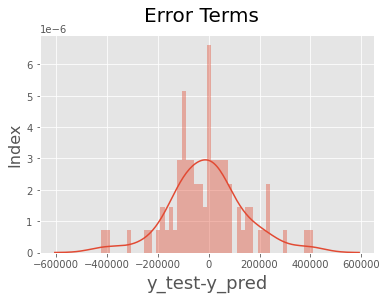

In [73]:
fig = plt.figure()
sns.distplot((y_test-y_preds),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

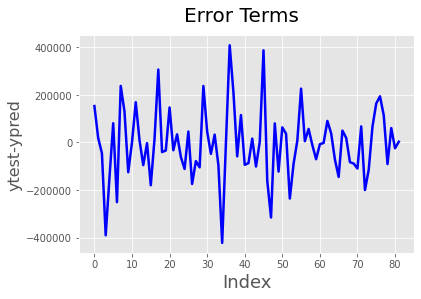

In [76]:
# Error terms
c = [i for i in range(len(y_preds))]
fig = plt.figure()
plt.plot(c,y_test-y_preds, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()

In [79]:
predictors = ['name','company']
cors = X.loc[:, list(predictors)].corr()
sns.heatmap(cors, annot=True)
plt.show()


#  0   name        892 non-null    object
#  1   company     892 non-null    object
#  2   year        892 non-null    object
#  3   Price       892 non-null    object
#  4   kms_driven  840 non-null    object
#  5   fuel_type   837 non-null    object

ValueError: zero-size array to reduction operation fmin which has no identity

In [71]:
model=LinearRegression().fit(x_train,y_train)
print(f"model accuracy on test set: {model.score(x_test,y_test)*100:.2f}%")

model accuracy on test set: 78.40%


In [ ]:
plt.figure(figsize = (15, 10))
plot = sns.countplot(x = 'company', data = X_train)
plt.xticks(rotation = 70)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

# RandomForestRegressor

In [ ]:
# x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.10)
from  sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_train,y_train)

In [ ]:
model.score(x_test,y_test)

In [ ]:
print(f"model accuracy on test set: {model.score(x_test,y_test)*100:.2f}%")

In [ ]:
y_preds= model.predict(x_test)
y_preds

C:\Users\Expert\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


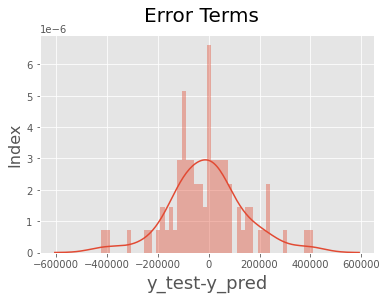

In [75]:
fig = plt.figure()
sns.distplot((y_test-y_preds),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

# svm

In [ ]:
from sklearn.svm import SVC
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.10, random_state = 123)
model = SVC()
model.fit(x_train, y_train)
model.score(x_train,y_train)

In [ ]:
model.score(x_test,y_test)

In [ ]:
y_preds= model.predict(x_test)
y_preds

# XG REGRESSOR

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# Splitting
train_X, test_X, train_y, test_y = train_test_split(transformed_x, y,
                      test_size = 0.1, random_state = 13)

# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)
  

# Fitting the model
xgb_r.fit(x_train,y_train)
xgb_r.score(x_train,y_train)

In [ ]:
xgb_r.score(x_test,y_test)

In [ ]:
# Predict the model
pred = xgb_r.predict(test_X)  

In [ ]:

# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))